COURSERA 2

WEEK 1 

In [22]:
# THESE LIBRARIES ARE NEEDED FOR IMPLEMENTATION
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

In [17]:

X = np.load("data/X.npy")
y = np.load("data/y.npy")
X = X[0:1000]
y = y[0:1000]

In [15]:
# THIS CODE IS TO CHECK THE SHAPE OF THE DATA
# THIS WILL ALLOW ME TO SET THE DIMENTION OF MY INPUT LAYER AND OUTPUT LAYER ADDORDINGLY

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


In [25]:
# WE NEED TO CONVERT THE NUMPY ARRAYS INTO TENSORS FOR PYTORCH

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

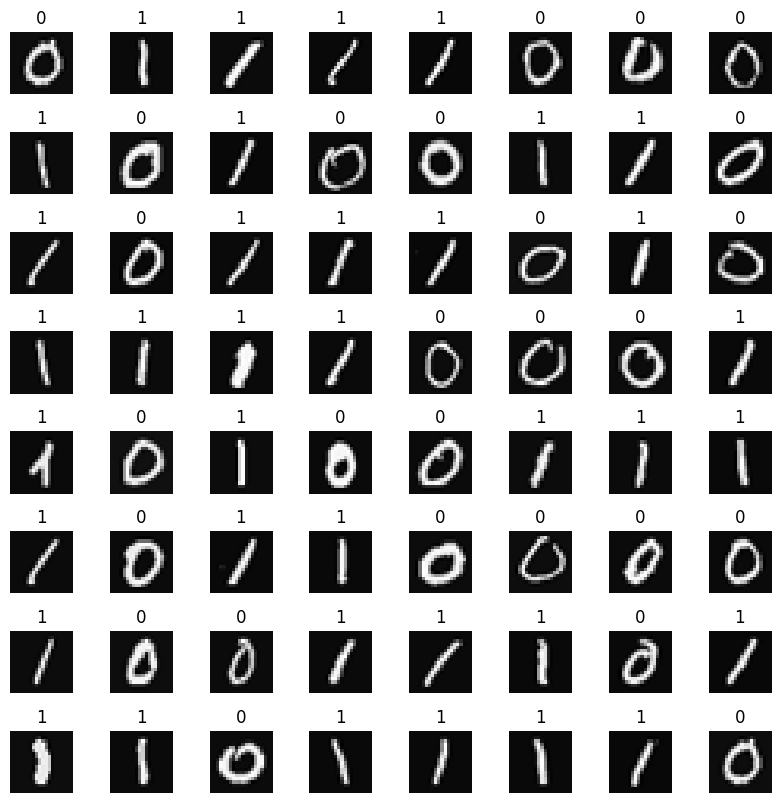

In [26]:
# THIS CODE IS TO VISUALLY SEE WHAT THE DATA SET CONTAINS. 
# WE ONLY HAVE 0 AND 1 DATA FROM MNIST
# THIS IS BINARY CLASSIFICATION 

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

Pytorch Implementation of neural network 

In [29]:
# HERE WE CREATE A JOINT DATASET FOR THE MODEL.
# PyTorch dataset wraps tensors. Each sample will be retrieved by indexing both tensors at the same index.

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset)) # 80 20 SPLIT IS PERFORMED ON THE DATASET HERE 
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# WE USE THE DATALOADER TO LOAD THE DATA IN BATCHES
# BATCH SIZE IS SET TO 32
# SHUFFLE IS SET TO TRUE FOR TRAINING DATA AND FALSE FOR VALIDATION DATA

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



# DEFINING THE DESIRED NN MODEL IN PYTORCH 
# THE MODEL CONTAINS 3 LAYERS
# THE INPUT LAYER HAS 400 NEURONS
# THE HIDDEN LAYER HAS 128 NEURONS
# THE HIDDEN LAYER HAS 64 NEURONS
# THE OUTPUT LAYER HAS 1 NEURON
# THE OUTPUT LAYER HAS 1 NEURON BECAUSE THERE IS BINARY ANSWER. EITHER 1 OR 0

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(400, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    
    # THIS IS FORWARD PASS OF NEURAL NETWORK
    # THE INPUT IS FLATTENED TO 1D TENSOR
    # WE HAVE USED RELU ACTIVATION FUNCTION IN THE HIDDEN LAYERS
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# THE LOSS FUNCTION USED IS BINARY CROSS ENTROPY LOSS
# THE OPTIMIZER USED IS ADAM OPTIMIZER
# THE LEARNING RATE IS SET TO BE 0.001
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# TRAINING THE MODEL
# THE MODEL IS TRAINED FOR 20 EPOCHS
# THE TRAINING LOSS IS PRINTED AFTER EACH EPOCH
# THE TRAINING LOSS DECREASES AS THE EPOCHS INCREASES

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs) # FORWARD PASS. RESULTS ARE STORED IN OUTPUTS
        loss = criterion(outputs, targets) # CALCULATING LOSS
        loss.backward() # BACKWARD PASS
        optimizer.step() # UPDATING THE WEIGHTS
        running_loss += loss.item() # ADDING THE LOSS TO THE RUNNING LOSS
    
    # 
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


Epoch 1/20, Training Loss: 0.4090, Validation Loss: 0.1004
Epoch 2/20, Training Loss: 0.0336, Validation Loss: 0.0087
Epoch 3/20, Training Loss: 0.0114, Validation Loss: 0.0044
Epoch 4/20, Training Loss: 0.0073, Validation Loss: 0.0032
Epoch 5/20, Training Loss: 0.0073, Validation Loss: 0.0031
Epoch 6/20, Training Loss: 0.0034, Validation Loss: 0.0038
Epoch 7/20, Training Loss: 0.0019, Validation Loss: 0.0017
Epoch 8/20, Training Loss: 0.0018, Validation Loss: 0.0019
Epoch 9/20, Training Loss: 0.0007, Validation Loss: 0.0012
Epoch 10/20, Training Loss: 0.0007, Validation Loss: 0.0014
Epoch 11/20, Training Loss: 0.0005, Validation Loss: 0.0012
Epoch 12/20, Training Loss: 0.0004, Validation Loss: 0.0011
Epoch 13/20, Training Loss: 0.0003, Validation Loss: 0.0010
Epoch 14/20, Training Loss: 0.0003, Validation Loss: 0.0009
Epoch 15/20, Training Loss: 0.0002, Validation Loss: 0.0009
Epoch 16/20, Training Loss: 0.0002, Validation Loss: 0.0009
Epoch 17/20, Training Loss: 0.0002, Validation Lo